In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
import math
from sklearn.externals.six import StringIO 
import pydot
from sklearn import tree
from sklearn.svm import SVC
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

%matplotlib inline
train_data = pd.read_csv("../Data/CE802_P2_Data.csv",sep=',')
test_data = pd.read_csv("../Data/CE802_P2_Test.csv",sep=',')
result_file="Results/CE802_P2_Test.csv"



C:\Conda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)

Bad key "text.kerning_factor" on line 4 in
C:\Conda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-471.81,-1.14,20,7.45,1.98,-0.18,-9.18,-38.61,-28.14,-12.90,60,-189.87,8.45,4.85,9.24,False
1,-546.81,-8.52,20,6.40,4.24,3.42,-11.31,-46.26,-48.14,-11.28,350,-44.87,7.20,2.91,10.32,False
2,-486.81,-6.66,20,10.15,-1.22,3.34,-14.01,-39.81,-48.14,-12.14,190,-124.87,8.55,6.31,11.25,True
3,-282.81,8.37,2,0.38,3.58,-16.24,2.19,-22.26,-22.14,-22.32,10,-34.87,1.43,8.50,10.15,False
4,-336.81,-2.16,20,8.45,-1.18,2.94,-11.10,-37.11,-28.14,-15.84,105,-124.87,6.45,4.17,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-366.81,4.20,20,6.40,1.92,1.16,-4.98,-39.81,-48.14,-14.44,335,-209.87,9.05,6.70,9.00,False
1496,-186.81,2.94,20,5.35,-0.84,-10.00,-6.51,-37.11,-48.14,-18.18,95,-39.87,10.45,4.86,9.31,False
1497,-240.81,7.92,2,0.54,1.88,-7.66,0.78,-23.31,-22.14,-20.54,17,-42.87,0.10,8.92,NaN,False
1498,-258.81,8.31,2,0.59,-0.80,-6.64,1.95,-21.57,-26.14,-22.94,15,-41.87,1.68,9.11,10.92,False


In [3]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,NaN,NaN
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.64,NaN
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.84,NaN
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.13,NaN
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-321.81,-7.17,20,7.25,2.14,4.84,-13.05,-44.31,-28.14,-10.76,360,-34.87,7.90,3.36,11.22,NaN
1496,-306.81,-5.28,20,7.10,0.22,2.70,-10.38,-39.81,-28.14,-16.82,295,-64.87,14.05,3.45,NaN,NaN
1497,-270.81,8.10,2,0.88,2.58,-7.40,3.87,-21.48,-26.14,-20.74,20,-33.87,1.29,8.97,9.61,NaN
1498,-516.81,-2.88,20,7.60,-0.02,0.88,-7.98,-37.71,-48.14,-21.10,130,-219.87,6.65,4.86,NaN,NaN


In [4]:
def clean_data(data):
    for i in range(1,data.shape[1]):
#         false_mean=data[data["Class"]== False]["F"+str(i)].mean()
#         true_mean=data[data["Class"]== True]["F"+str(i)].mean()
        col_mean=data["F"+str(i)].mean()
        data['F'+str(i)] = data['F'+str(i)].replace(np.nan, col_mean)
    return data
    

In [5]:
train_data = clean_data(train_data)
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-471.81,-1.14,20,7.45,1.98,-0.18,-9.18,-38.61,-28.14,-12.90,60,-189.87,8.45,4.85,9.240000,False
1,-546.81,-8.52,20,6.40,4.24,3.42,-11.31,-46.26,-48.14,-11.28,350,-44.87,7.20,2.91,10.320000,False
2,-486.81,-6.66,20,10.15,-1.22,3.34,-14.01,-39.81,-48.14,-12.14,190,-124.87,8.55,6.31,11.250000,True
3,-282.81,8.37,2,0.38,3.58,-16.24,2.19,-22.26,-22.14,-22.32,10,-34.87,1.43,8.50,10.150000,False
4,-336.81,-2.16,20,8.45,-1.18,2.94,-11.10,-37.11,-28.14,-15.84,105,-124.87,6.45,4.17,10.743013,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-366.81,4.20,20,6.40,1.92,1.16,-4.98,-39.81,-48.14,-14.44,335,-209.87,9.05,6.70,9.000000,False
1496,-186.81,2.94,20,5.35,-0.84,-10.00,-6.51,-37.11,-48.14,-18.18,95,-39.87,10.45,4.86,9.310000,False
1497,-240.81,7.92,2,0.54,1.88,-7.66,0.78,-23.31,-22.14,-20.54,17,-42.87,0.10,8.92,10.743013,False
1498,-258.81,8.31,2,0.59,-0.80,-6.64,1.95,-21.57,-26.14,-22.94,15,-41.87,1.68,9.11,10.920000,False


In [6]:
test_data = clean_data(test_data)
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,10.776347,NaN
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.640000,NaN
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.840000,NaN
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.130000,NaN
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,10.776347,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-321.81,-7.17,20,7.25,2.14,4.84,-13.05,-44.31,-28.14,-10.76,360,-34.87,7.90,3.36,11.220000,NaN
1496,-306.81,-5.28,20,7.10,0.22,2.70,-10.38,-39.81,-28.14,-16.82,295,-64.87,14.05,3.45,10.776347,NaN
1497,-270.81,8.10,2,0.88,2.58,-7.40,3.87,-21.48,-26.14,-20.74,20,-33.87,1.29,8.97,9.610000,NaN
1498,-516.81,-2.88,20,7.60,-0.02,0.88,-7.98,-37.71,-48.14,-21.10,130,-219.87,6.65,4.86,10.776347,NaN


In [7]:
X = train_data.drop('Class', axis=1)
columns=X.columns
y = train_data['Class']
X_test=test_data.drop('Class',axis=1)

In [8]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_test=scaler.fit_transform(X_test)

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.20,stratify=y)

In [10]:
knn = KNeighborsClassifier(n_neighbors=15,metric='manhattan',weights="distance")
rbf = SVC(kernel='rbf', C=1e2, gamma=0.03)
lin = SVC(kernel='linear')
dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=None)


In [11]:
# knn.fit(X_train, y_train)
rbf.fit(X_train, y_train)
lin.fit(X_train, y_train)
# dtc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
knn_params = {'n_neighbors':np.arange(start=1,stop=150,step=1)}
dtc_params = {'criterion':['gini','entropy'],'max_depth':np.arange(start=1, stop=30,step=1),'min_samples_split':np.arange(start=1,stop=15,step=1),'min_samples_leaf':np.arange(start=1,stop=15,step=1),'max_features': ['auto', 'sqrt','log2']}
rbf_params = {'C':np.arange(start=1,stop=100,step=2).tolist()+[1000],'gamma':np.arange(start=0.009,stop=0.05,step=0.001)}
lin_params = {'C':np.arange(start=0.1,stop=5,step=0.1),'gamma':np.arange(start=0.009,stop=0.05,step=0.001)}

In [13]:
# cv_acc_knn = round(cross_val_score(knn, X_train, y_train, cv = 5, scoring='accuracy').mean(),3)
knn_grid = GridSearchCV(knn, knn_params, cv=5, return_train_score=True, scoring="accuracy", verbose=10, n_jobs=-1)
rbf_grid = GridSearchCV(rbf, rbf_params, cv=5, return_train_score=True, scoring="accuracy", verbose=10, n_jobs=-1)
lin_grid = GridSearchCV(lin, lin_params, cv=5, return_train_score=True, scoring="accuracy", verbose=10, n_jobs=-1)
dtc_grid = GridSearchCV(dtc, dtc_params, cv=5, return_train_score=True, scoring="accuracy", verbose=10, n_jobs=-1)

knn_grid.fit(X_train, y_train)
rbf_grid.fit(X_train, y_train)
lin_grid.fit(X_train, y_train)
dtc_grid.fit(X_train, y_train)

knn=knn_grid.best_estimator_
rbf=rbf_grid.best_estimator_
lin=lin_grid.best_estimator_
dtc=dtc_grid.best_estimator_

print(knn)
print(rbf)
print(lin)
print(dtc)

cv_acc_knn=round(knn_grid.cv_results_['mean_test_score'].mean(),3)
cv_acc_rbf=round(rbf_grid.cv_results_['mean_test_score'].mean(),3)
cv_acc_lin=round(lin_grid.cv_results_['mean_test_score'].mean(),3)
cv_acc_dtc=round(np.nanmean(dtc_grid.cv_results_['mean_test_score']),3)

# cv_acc_rbf = round(cross_val_score(rbf, X_train, y_train, cv = 5, scoring='accuracy').mean(),3)
# cv_acc_lin = round(cross_val_score(lin, X_train, y_train, cv = 5, scoring='accuracy').mean(),3)
# cv_acc_dtc = round(cross_val_score(dtc, X_train, y_train, cv = 5, scoring='accuracy').mean(),3)

Fitting 5 folds for each of 149 candidates, totalling 745 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1855s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1755s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:    8.8s
[Parallel(n_jo

Fitting 5 folds for each of 2091 candidates, totalling 10455 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    7.9s
[Paralle

Fitting 5 folds for each of 2009 candidates, totalling 10045 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0578s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1546s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    5.8s
[Parallel(n_jo

Fitting 5 folds for each of 34104 candidates, totalling 170520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0484s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0519s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0449s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0833s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1930s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1016 tasks      | elapsed:    1.8s
[Parallel(

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=73, p=2,
                     weights='distance')
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.027999999999999983,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
SVC(C=3.8000000000000003, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.009,
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=28, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_sa

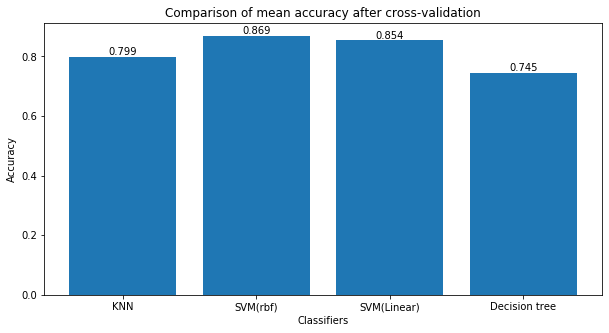

In [14]:
names = ['KNN','SVM(rbf)','SVM(Linear)','Decision tree']
values = [cv_acc_knn, cv_acc_rbf ,cv_acc_lin, cv_acc_dtc]
fig = plt.figure(figsize = (10, 5))
# creating the bar plot 
plt.bar(names, values) 
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(names[i],values[i]), ha='center', va='bottom')  
plt.xlabel("Classifiers") 
plt.ylabel("Accuracy") 
plt.title("Comparison of mean accuracy after cross-validation") 
plt.show() 

In [15]:
dtc_grid.cv_results_

{'mean_fit_time': array([0.00139666, 0.00219469, 0.00199637, ..., 0.00578384, 0.00418992,
        0.00438757]),
 'std_fit_time': array([0.00048891, 0.00039778, 0.00089228, ..., 0.00270548, 0.00039796,
        0.00048797]),
 'mean_score_time': array([0.        , 0.00079708, 0.00059824, ..., 0.00079823, 0.00179377,
        0.00079861]),
 'std_score_time': array([0.        , 0.00039854, 0.00048846, ..., 0.00039911, 0.00159662,
        0.0003993 ]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 29, 29, 29],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', ..., 'log2', 'log2', 'log2'],
              mask=[False,

In [16]:
y_predict_knn = knn.predict(X_valid)
y_predict_rbf = rbf.predict(X_valid)
y_predict_lin = lin.predict(X_valid)
y_predict_dtc = dtc.predict(X_valid)

In [17]:
knn_acc = round(accuracy_score(y_valid, y_predict_knn),3)
rbf_acc = round(accuracy_score(y_valid, y_predict_rbf),3)
lin_acc = round(accuracy_score(y_valid, y_predict_lin),3)
dtc_acc = round(accuracy_score(y_valid, y_predict_dtc),3)

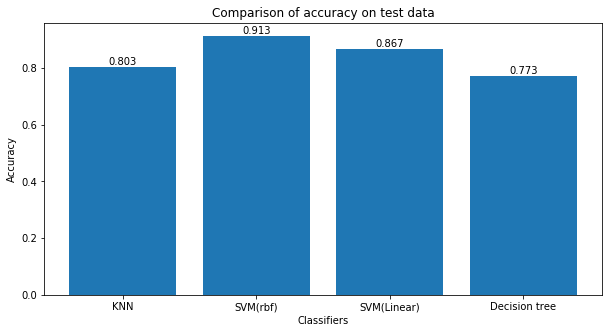

In [18]:
values = [knn_acc, rbf_acc, lin_acc, dtc_acc]
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(names, values) 
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(names[i],values[i]), ha='center', va='bottom')    
plt.xlabel("Classifiers") 
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracy on test data") 
plt.show() 

In [19]:
print("KNN")
print(confusion_matrix(y_valid,y_predict_knn))
print(classification_report(y_valid,y_predict_knn))
print()
print("SVM classifier with rbf")
print(confusion_matrix(y_valid,y_predict_rbf))
print(classification_report(y_valid,y_predict_rbf))
print()
print("SVM classifier with linear function")
print(confusion_matrix(y_valid,y_predict_lin))
print(classification_report(y_valid,y_predict_lin))
print()
print("decision tree classifier")
print(confusion_matrix(y_valid,y_predict_dtc))
print(classification_report(y_valid,y_predict_dtc))

KNN
[[146  16]
 [ 43  95]]
              precision    recall  f1-score   support

       False       0.77      0.90      0.83       162
        True       0.86      0.69      0.76       138

    accuracy                           0.80       300
   macro avg       0.81      0.79      0.80       300
weighted avg       0.81      0.80      0.80       300


SVM classifier with rbf
[[149  13]
 [ 13 125]]
              precision    recall  f1-score   support

       False       0.92      0.92      0.92       162
        True       0.91      0.91      0.91       138

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300


SVM classifier with linear function
[[141  21]
 [ 19 119]]
              precision    recall  f1-score   support

       False       0.88      0.87      0.88       162
        True       0.85      0.86      0.86       138

    accuracy                           0.87    

In [20]:
# print("Optimal k-number of nearest neighbours is",optimal_neighbor_number)

In [21]:
# knn = KNeighborsClassifier(n_neighbors=optimal_neighbor_number,metric='manhattan')
# knn.fit(X_train, y_train)
# cv_score = cross_val_score(knn, X_train, y_train, cv = 5, scoring='accuracy')

In [22]:
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data, feature_names=columns)

In [23]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png("Results/tree.tif")

In [24]:
f = Image.open("Results/tree.tif").show()

In [25]:
y_predict_knn = knn.predict(X_test)
y_pred_test_lin = lin.predict(X_test)
y_pred_test_rbf=rbf.predict(X_test)
y_predict_test_dtc = dtc.predict(X_test)

In [26]:
df = pd.DataFrame({'Predicted #':range(0,len(y_predict_knn)),
                   'K-nearest neighbours':y_predict_knn,
                   'Support vector machine with linear function':y_pred_test_lin,
                   'Predicted(Support Vector Machine with rbf)':y_pred_test_rbf,
                   'Predicted(Support Vector Machine with rbf)':y_predict_test_dtc})
df.set_index('Predicted #',inplace=True)
df.head(25)

,K-nearest neighbours,Support vector machine with linear function,Predicted(Support Vector Machine with rbf)
Predicted #,,,
0,False,True,False
1,True,True,True
2,True,True,True
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,True,True,True
8,True,True,True


In [27]:
for i in range(0,len(y_predict_knn)):
    test_data.loc[i,'Class']=y_pred_test_rbf[i]
    

In [28]:
test_data.head(25)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,10.776347,False
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.640000,True
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.840000,True
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.130000,False
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,10.776347,False
5,-252.81,8.73,2,0.32,0.32,-7.20,5.19,-20.85,-26.14,-22.14,17,-35.87,1.80,12.08,9.530000,False
6,-252.81,8.01,2,0.64,2.64,-6.42,3.63,-21.18,-26.14,-26.02,6,-46.87,0.74,11.45,10.010000,False
7,-276.81,8.67,2,0.74,0.36,-9.08,1.32,-22.71,-24.14,-20.88,14,-24.87,1.83,8.94,12.230000,True
8,-225.81,11.70,2,0.06,1.30,-7.90,2.73,-22.29,-26.14,-20.84,2,-9.87,1.86,10.26,11.320000,True
9,-216.81,9.54,2,0.61,-0.42,-10.12,7.02,-23.07,-26.14,-21.86,13,-3.87,1.74,10.72,10.776347,True


In [29]:
test_data.to_csv(result_file, sep=',')

In [30]:
results={"KNN":y_predict_knn,"SVM(Linear)":y_pred_test_lin, "SVM(rbf)":y_pred_test_rbf,"DT":y_predict_test_dtc}
df = pd.DataFrame(results,columns=results.keys())

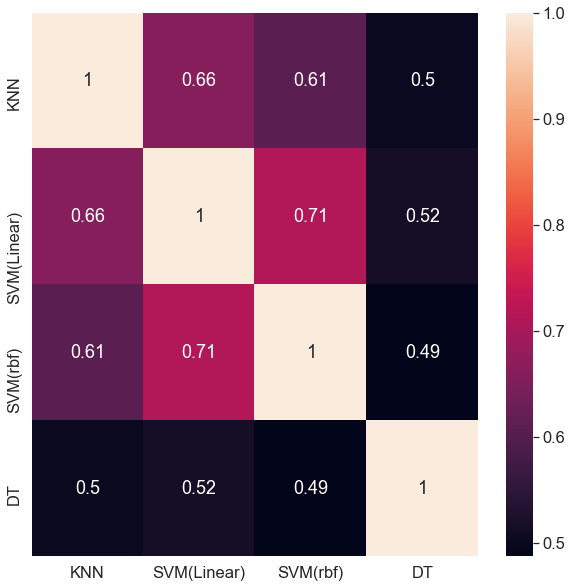

In [31]:
corrMatrix = df.corr()
plt.figure(figsize=(10,10))
sn.set(font_scale=1.5)

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [32]:
corrMatrix

,KNN,SVM(Linear),SVM(rbf),DT
KNN,1.000000,0.659639,0.607912,0.501583
SVM(Linear),0.659639,1.000000,0.711691,0.515974
SVM(rbf),0.607912,0.711691,1.000000,0.487358
DT,0.501583,0.515974,0.487358,1.000000


In [33]:
# error = []
# accuracy=[]
# max_acc=0.0
# optimal_neighbor_number=5
# for i in range(1, 100):
#     knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
#     knn.fit(X_train, y_train)
#     cv_score = cross_val_score(knn, X_train, y_train, cv =5, scoring='accuracy')
#     print("#",i,"CV mean accuracy:", cv_score.mean())
    
#     pred_i = knn.predict(X_valid)
#     acc=accuracy_score(y_valid, pred_i)
#     err=np.mean(pred_i != y_valid)

#     print("Validation accuracy:", acc)
#     error.append(err)
#     accuracy.append(acc)
#     print("Error: ", err)
#     print("=======================")
#     if acc>max_acc:
#         max_acc=acc
#         optimal_neighbor_number=i

In [34]:
# plt.figure(figsize=(20, 10))
# plt.plot(range(1, 100), error,color='red', linestyle='dashed', marker='o',
#          markerfacecolor='blue', markersize=10)
# plt.title('Dependence of Mean Error from K-Value')
# plt.xlabel('K Value')
# plt.ylabel('Mean Error')

In [35]:
# plt.figure(figsize=(20, 10))
# plt.plot(range(1, 100), accuracy,color='red', linestyle='dashed', marker='o',
#          markerfacecolor='blue', markersize=10)
# plt.title('Dependence of accuracy from K-Value')
# plt.xlabel('K Value')
# plt.ylabel('Accuracy')

In [36]:
# pred_i = knn.predict(X_valid)
# acc=accuracy_score(y_valid, pred_i)
# print("Validation accuracy:", acc)